## Initialization

In [57]:
!pip uninstall -y xgboost
!pip install xgboost --no-cache-dir
!export PATH="/usr/local/opt/llvm/bin:$PATH"
!export LDFLAGS="-L/usr/local/opt/llvm/lib"
!export CPPFLAGS="-I/usr/local/opt/llvm/include"
!brew reinstall libomp
!xcode-select --install

Found existing installation: xgboost 2.1.4
Uninstalling xgboost-2.1.4:
  Successfully uninstalled xgboost-2.1.4
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00
zsh:1: command not found: brew
xcode-select: note: Command line tools are already installed. Use "Software Update" in System Settings or the softwareupdate command line interface to install updates


In [58]:
%pip install numpy pandas scikit-learn matplotlib seaborn xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [61]:
X = my_data[['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [62]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [63]:
#Pre-processing convert numeric variables
from sklearn import preprocessing
le_Sex = preprocessing.LabelEncoder()
le_Sex.fit(['F','M'])
X[:,1] = le_Sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [64]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [65]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y, test_size=0.3, random_state=99)
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y test set {}'.format(y_testset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)
Shape of X test set (60, 5) &  Size of Y test set (60,)


# Decision Tree

In [66]:
# Modeling
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [67]:
# %% Prediction
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['drugX' 'drugX' 'drugA' 'drugA' 'drugY']
135    drugX
127    drugX
191    drugA
66     drugA
119    drugY
Name: Drug, dtype: object


In [68]:
#%% Evaluation
from sklearn import metrics

DTAccuracy = metrics.accuracy_score(y_testset, predTree)

print("DecisionTrees's Accuracy: ", DTAccuracy)


DecisionTrees's Accuracy:  0.9833333333333333


In [69]:
print("Decision Tree Classification Report:\n", classification_report(y_testset, predTree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.95      0.97        19
       drugY       0.96      1.00      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



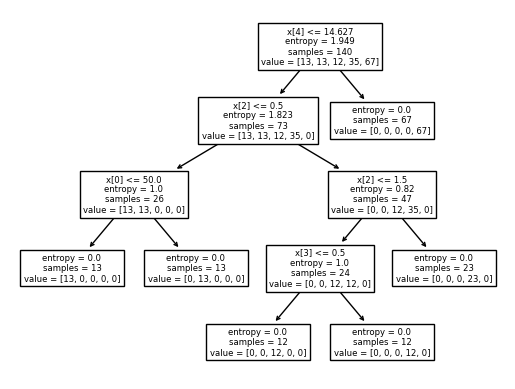

In [70]:
# %% Visualization

tree.plot_tree(drugTree)
plt.show()


# KNN

In [71]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [116]:
# Initialize KNN with k=5
knn_model = KNeighborsClassifier(n_neighbors=4)

# Train the KNN model
knn_model.fit(X_trainset, y_trainset)

KNeighborsClassifier(n_neighbors=4)

In [117]:
y_pred_knn = knn_model.predict(X_testset)

In [118]:
# Prediction
print (y_pred_knn [0:5])
print (y_testset [0:5])

KNNAccuracy = metrics.accuracy_score(y_testset, y_pred_knn)

print("KNN's Accuracy: ", KNNAccuracy)


['drugB' 'drugX' 'drugC' 'drugA' 'drugY']
135    drugX
127    drugX
191    drugA
66     drugA
119    drugY
Name: Drug, dtype: object
KNN's Accuracy:  0.75


In [119]:
# Print classification report
print("KNN Classification Report:\n", classification_report(y_testset, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

       drugA       0.88      0.70      0.78        10
       drugB       0.33      1.00      0.50         3
       drugC       0.20      0.25      0.22         4
       drugX       0.79      0.58      0.67        19
       drugY       0.96      0.96      0.96        24

    accuracy                           0.75        60
   macro avg       0.63      0.70      0.63        60
weighted avg       0.81      0.75      0.76        60



# SVM

In [120]:
from sklearn.svm import SVC

# Initialize SVM with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_trainset, y_trainset)

SVC(kernel='linear', random_state=42)

In [121]:
# Predict on test set
y_pred_svm = svm_model.predict(X_testset)

In [122]:
svm_accuracy = accuracy_score(y_testset, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Print classification report
print("SVM Classification Report:\n", classification_report(y_testset, y_pred_svm))

SVM Accuracy: 1.0000
SVM Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        24

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# XGBoost

In [123]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(eval_metric='mlogloss', n_estimators=50, max_depth=3, random_state=42)


xgb_model.fit(X_trainset, y_trainset)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/fisher/Library/Python/3.8/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <FBD6AEF9-AFAB-39D7-B881-755157DA0497> /Users/fisher/Library/Python/3.8/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]


           Model  Accuracy
0  Decision Tree  0.983333
1            KNN  0.750000
2            SVM  1.000000


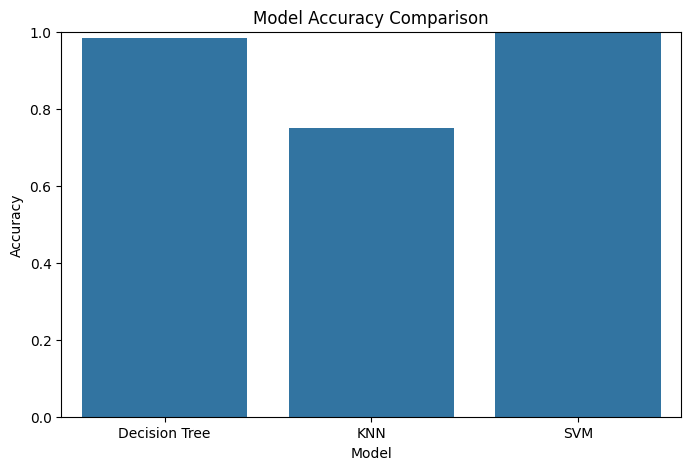

In [124]:


# Store model accuracies in a dictionary
model_accuracies = {
    "Decision Tree": DTAccuracy,
    "KNN": KNNAccuracy,
    "SVM": svm_accuracy
}

# Convert dictionary to DataFrame
accuracy_df = pd.DataFrame(model_accuracies.items(), columns=["Model", "Accuracy"])

# Display accuracy table
print(accuracy_df)

# Plot accuracy scores
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()


In [125]:
print("Decision Tree Classification Report:\n", classification_report(y_testset, predTree))
print("KNN Classification Report:\n", classification_report(y_testset, y_pred_knn))
print("SVM Classification Report:\n", classification_report(y_testset, y_pred_svm))

Decision Tree Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.95      0.97        19
       drugY       0.96      1.00      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

KNN Classification Report:
               precision    recall  f1-score   support

       drugA       0.88      0.70      0.78        10
       drugB       0.33      1.00      0.50         3
       drugC       0.20      0.25      0.22         4
       drugX       0.79      0.58      0.67        19
       drugY       0.96      0.96      0.96        24

    accuracy                           0.75        60
   macro avg       0.63      0.70      0.63        60
weighted av